# 1.1 Image processing and manipulation with OpenCV

In [ ]:
pip install opencv-python

In [ ]:
!wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2025-08-11 16:00:09--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Resolving www.birzeit.edu (www.birzeit.edu)... 172.66.148.78, 104.20.23.190, 2606:4700:10::6814:17be, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|172.66.148.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258627 (253K) [image/jpeg]
Saving to: ‘buildings.jpg’

buildings.jpg       100%[===================>] 252.57K   545KB/s    in 0.5s    

2025-08-11 16:00:11 (545 KB/s) - ‘buildings.jpg’ saved [258627/258627]



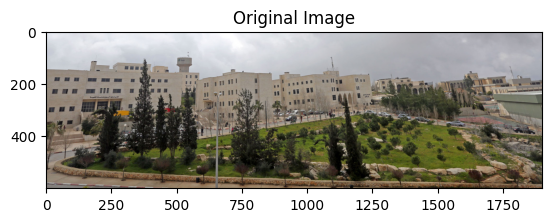

In [ ]:
#Code Snippet 1.1: Loading and displaying an image.

import cv2 as cv
import matplotlib.pyplot as plt
# Load an image
image = cv.imread('buildings.jpg')
# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

Task 1: What is the shape of the loaded image? What does each dimension represent?

In [ ]:
print(image.shape)


(600, 1900, 3)


 tuple with three values, e.g. (height, width, channels).

Height: Number of rows (pixels vertically).

Width: Number of columns (pixels horizontally).

Channels: Number of color channels (usually 3 for a color image — Blue, Green, Red in OpenCV).

So, if the shape is (600, 1900, 3), it means the image is 600 pixels tall, 1900 pixels wide, and has 3 color channels (BGR).

Task 2: repeat the previous code but now pass the image directly to plt.imshow().
I.e., without using cv.cvtColor(). Do you notice any difference? Why?

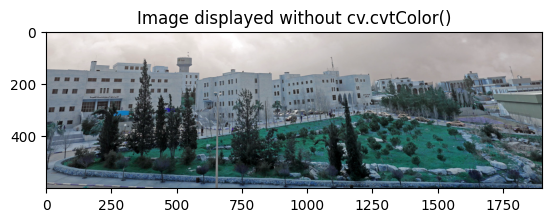

In [ ]:
#Code Snippet 1.1: Loading and displaying an image without cv.cvtColor().

import cv2 as cv
import matplotlib.pyplot as plt
# Load an image
image = cv.imread('buildings.jpg')
# Display the image directly
plt.imshow(image)
plt.title('Image displayed without cv.cvtColor()')
plt.show()

Grayscale conversion

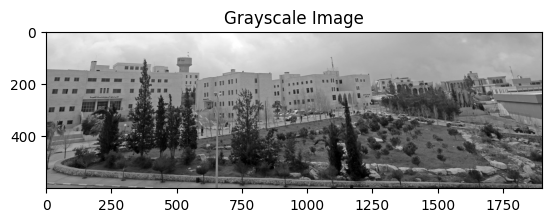

In [ ]:
#Code Snippet 1.2: Grayscale conversion.

import cv2 as cv
import matplotlib.pyplot as plt
# Load an image
image = cv.imread('buildings.jpg')

# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Task 3: What is the shape of the gray image? What does each dimension represent?

This means the image is a 2D array, because it contains only intensity (brightness) values and no color channels.
Height: Number of rows — represents the image’s vertical resolution (pixels from top to bottom).

Width: Number of columns — represents the image’s horizontal resolution (pixels from left to right).



Image transformation

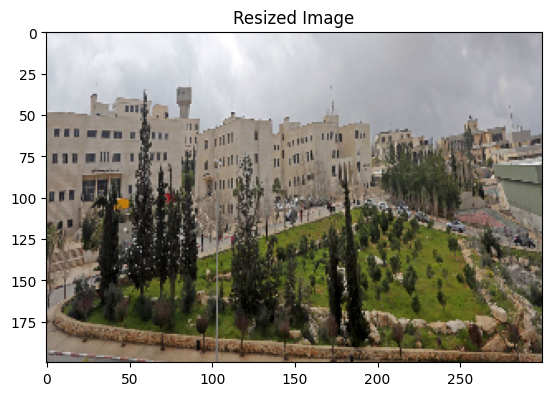

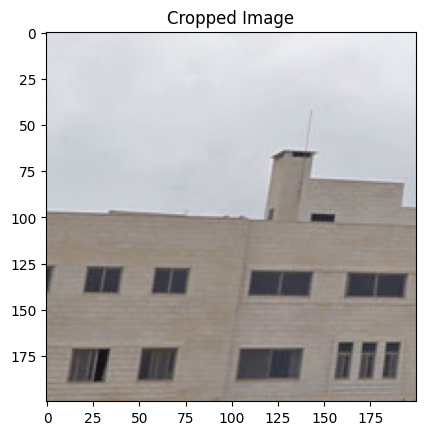

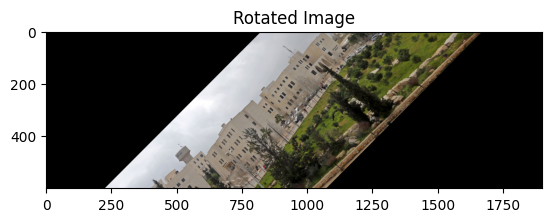

In [ ]:
#Code Snippet 1.3: Image transformation.

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Resize and crop the image
resized_image = cv.resize(image, (300, 200))
cropped_image = image[50:250, 50:250]
# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))
# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

Task 4: Rotate the original image by 10 degrees counter-clockwise around the upper-
left corner of the image.

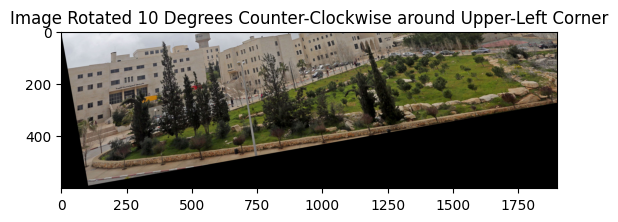

In [ ]:
# Code to rotate the original image by 10 degrees counter-clockwise around the upper-left corner.

import cv2 as cv
import matplotlib.pyplot as plt

# Load the original image again, as it might have been modified in previous cells
image = cv.imread('buildings.jpg')
# Convert to RGB for displaying with matplotlib
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

rows, cols = image_rgb.shape[:2]

# Get the rotation matrix for 10 degrees counter-clockwise rotation around the upper-left corner (0, 0)
M = cv.getRotationMatrix2D((0, 0), 10, 1)

# Apply the rotation to the image
rotated_image_task4 = cv.warpAffine(image_rgb, M, (cols, rows))

# Display the rotated image
plt.imshow(rotated_image_task4)
plt.title('Image Rotated 10 Degrees Counter-Clockwise around Upper-Left Corner')
plt.show()

Gaussian blurring

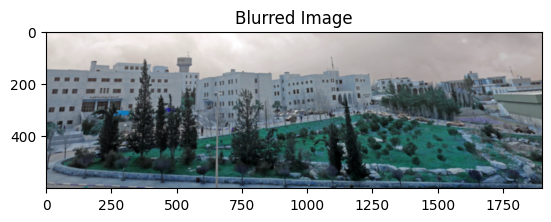

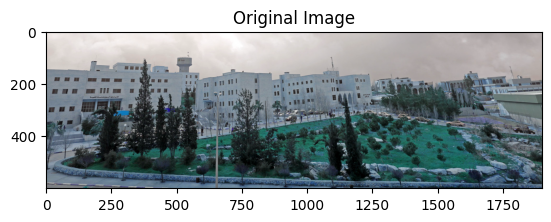

In [ ]:
#Code Snippet 1.4: Gaussian blurring.

# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0) #(7, 7) Kernel size
# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()
plt.imshow(image)
plt.title('Original Image')
plt.show()

Task 5: What does (7, 7) in the previous code represent? try to increase this value,
what do you notice?

(7, 7) is the kernel size — it's the size of the matrix used to calculate the weighted average for blurring.
A larger kernel includes more neighboring pixels, so each pixel’s new value is influenced by a wider area.

That leads to smoother transitions and less sharpness.

Edge detection

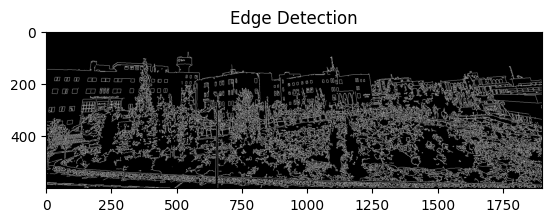

In [ ]:
#Code Snippet 1.5: Edge detection.

# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

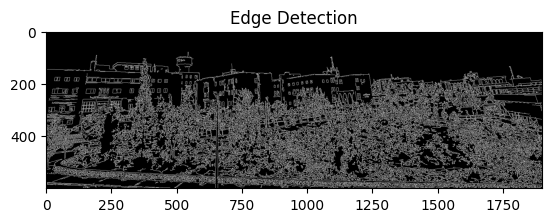

In [ ]:
###
#Code Snippet 1.5: Edge detection.

# Perform edge detection using Canny
edges = cv.Canny(gray_image, 30, 100)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

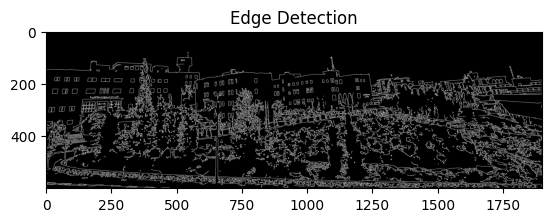

In [ ]:
#Code Snippet 1.5: Edge detection.

# Perform edge detection using Canny
edges = cv.Canny(gray_image, 100, 200)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

Task 6: Explain the parameters of cv.Canny(). How do they affect the results?

 How threshold1 and threshold2 affect results:
Thresholds are used in a hysteresis process:

Gradients above threshold2: Always considered edges.

Gradients below threshold1: Always ignored.

Gradients between threshold1 and threshold2: Considered edges only if connected to strong edges.

# 1.2 Image Classification / Object Recognition

1.2.1 Image classification with MLP

In [ ]:
#Code Snippet 1.6: Loading and normalizing CIFAR10 images.

import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',

'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:01<00:00, 99.1MB/s]


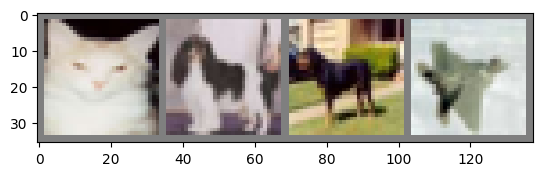

cat   dog   dog   plane


In [ ]:
#Code Snippet 1.7: Displaying some training images.

import matplotlib.pyplot as plt
import numpy as np
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Task 7: Explain the effect of the following transforms transforms.ToTensor(), and
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).

transforms.ToTensor()
Converts a PIL image or NumPy array to a PyTorch tensor.

Changes pixel values from 0–255 (integers) → to 0–1 (floats) by dividing by 255.

Also changes the shape from (H, W, C) → to (C, H, W) (channel first).

transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
Normalizes the image tensor per channel (R, G, B):

normalized
=
𝑥
−
mean
std
=
𝑥
−
0.5
0.5
normalized=
std
x−mean
​
 =
0.5
x−0.5
​

This shifts values to be in range [-1, 1], which helps models train faster and better.

Task 8: What is the purpose of the following line: np.transpose(npimg, (1, 2, 0))?

Purpose of np.transpose(npimg, (1, 2, 0))
Image tensors in PyTorch are in shape: (C, H, W)
(channels first: e.g. 3×32×32)

matplotlib.pyplot.imshow() expects: (H, W, C)
(channels last)

So this line reorders dimensions to make the image display correctly.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
net.to(device)


cpu


Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net.train()
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.949
[1,  4000] loss: 1.739
[1,  6000] loss: 1.665
[1,  8000] loss: 1.660
[1, 10000] loss: 1.598
[1, 12000] loss: 1.584
[2,  2000] loss: 1.521
[2,  4000] loss: 1.518
[2,  6000] loss: 1.499
[2,  8000] loss: 1.496
[2, 10000] loss: 1.487
[2, 12000] loss: 1.475
Finished Training


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(torch.flatten(images,1))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 45 %


Task 9: For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64) ), what does
the number 3072 represent?

3072 : input features

---


32×32×3=3072

1.2.2 Image classification with CNNs

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NetCNN()
net = net.to(device)


In [ ]:
################
import torch
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NetCNN()
net = net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss / len(trainloader):.3f}")


net.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the network on the {total} test images: {accuracy:.2f}%")


Epoch 1 loss: 1.725
Epoch 2 loss: 1.338
Accuracy of the network on the 10000 test images: 55.80%


Task 10: Study the CNN code and answer the following questions:
- How many layers does the network have?
- What does the parameters of nn.Conv2d represent?
- What does the parameters of nn.MaxPool2d represent?
- In the first linear layer, what does the number 16 * 5 * 5 represent? How to obtain
this number?

 1. How many layers does the network have?


The network consists of 5 main learnable layers:

2 convolutional layers: conv1, conv2

2 max pooling layers: used after each convolution

3 fully connected layers: fc1, fc2, fc3

However, only the convolutional and fully connected layers have learnable parameters, so the total number of learnable layers is 5.


---
2. nn.Conv2d(3, 6, 5) — what do the parameters mean?
3: input channels (RGB image)

6: output channels (filters)

5: kernel size = 5×5


---
 3. nn.MaxPool2d(2, 2) — what do the parameters mean?
2: kernel size = 2×2

2: stride = how much the window moves = 2
→ Reduces the size by half


---

4. What is 16 * 5 * 5 in the linear layer?
It's the flattened size of the feature map after:

2 convolutions (with kernel size 5)

2 max poolings (with size 2)

Starting from 32×32 → becomes 16×5×5

So: 16 * 5 * 5 = 400 units




1.2.3 Transfer Learning

In [ ]:
from torchvision import datasets, models
net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 53.5MB/s]


In [ ]:
transform = transforms.Compose(
[transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
from torchvision import datasets, models
net = models.alexnet()
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

In [ ]:
######################
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

trainset = datasets.CIFAR10(root='./data', train=True,
                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

# ====== Loss + Optimizer ======
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# ====== Training Loop ======
num_epochs = 2
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[{epoch+1}, {i+1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

# ====== Evaluation Loop ======
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f} %')


[1, 200] loss: 0.935
[1, 400] loss: 0.598
[1, 600] loss: 0.532
[2, 200] loss: 0.424
[2, 400] loss: 0.429
[2, 600] loss: 0.409
Finished Training
Accuracy of the network on the 10000 test images: 86.69 %
